In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

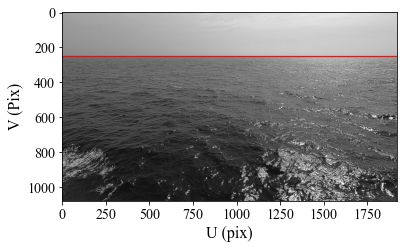

In [3]:
img = cv2.imread("E:/OneDrive - Texas A&M University/Code_sorted_PIV/original_frame70.jpg")

# sharpen the image to make the horizon more clear
sharpen_op = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]],
                      dtype=np.float32)
sharpen_image = cv2.filter2D(img, cv2.CV_32F, sharpen_op)
sharpen_image = cv2.convertScaleAbs(sharpen_image)
gray = cv2.cvtColor(sharpen_image, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 0, 255,
                            cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# noise removal
# dilate the gray image to get rid of the noise
# substruct the images with different dilation degree to get the horizon
# line
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
#opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

# sure background area
sure_bg = cv2.dilate(closing, kernel, iterations=50)
# sure foreground area
sure_fg = cv2.dilate(closing, kernel, iterations=49)
horizon = cv2.subtract(sure_bg, sure_fg)  # horizon

dst = cv2.Canny(horizon, 100, 255, None, 3)
#cdst1 = cv2.cvtColor(dst, cv2.COLOR_GRAY2BGR)
#cdst2 = cv2.cvtColor(cdst1, cv2.COLOR_BGR2GRAY)

lines = cv2.HoughLines(dst, 0.8, np.pi / 180, 200)
gray_show = cv2.cvtColor(gray, cv2.COLOR_GRAY2RGB)

for rho, theta in lines[0]:
    a = np.cos(theta)
    b = np.sin(theta)
    rho = rho + 50
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 10000 * (-b))
    y1 = int(y0 + 10000 * (a))
    x2 = int(x0 - 10000 * (-b))
    y2 = int(y0 - 10000 * (a))
    blackboard = np.zeros([1080, 1920])
    horizon_line = cv2.line(gray_show, (x1, y1), (x2, y2), 255, 6)
    
plt.imshow(gray_show)
plt.yticks(fontproperties = 'Times New Roman', size = 14)
plt.xticks(fontproperties = 'Times New Roman', size = 14)

font = {'family' : 'Times New Roman',
'weight' : 'normal',
'size'   : 16,
}

plt.xlabel("U (pix)", font)
plt.ylabel("V (Pix)", font)
plt.show()

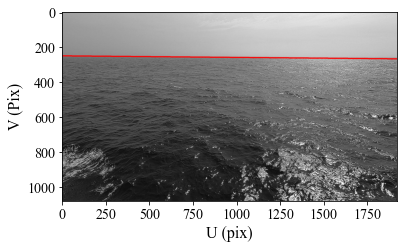

In [41]:
img = cv2.imread("E:/OneDrive - Texas A&M University/Code_sorted_PIV/original_frame70.jpg")

# sharpen the image to make the horizon more clear
sharpen_op = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]],
                      dtype=np.float32)
sharpen_image = cv2.filter2D(img, cv2.CV_32F, sharpen_op)
sharpen_image = cv2.convertScaleAbs(sharpen_image)
gray = cv2.cvtColor(sharpen_image, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 0, 255,
                            cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# noise removal
# dilate the gray image to get rid of the noise
# substruct the images with different dilation degree to get the horizon
# line
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
#opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

# sure background area
sure_bg = cv2.dilate(closing, kernel, iterations=50)
# sure foreground area
sure_fg = cv2.dilate(closing, kernel, iterations=49)
horizon = cv2.subtract(sure_bg, sure_fg)  # horizon

dst = cv2.Canny(horizon, 100, 255, None, 3)

horizon_loc = np.argwhere(dst>0)
horizon_loc_flip = np.flip(horizon_loc, axis=1)
lines = cv2.fitLine(horizon_loc_flip, cv2.DIST_L12, 0, 0.01, 0.01)
lefty = int((-lines[2]*lines[1]/lines[0]) + lines[3])
righty = int(((1920 - lines[2])*lines[1]/lines[0]) + lines[3])

gray_show = cv2.cvtColor(gray, cv2.COLOR_GRAY2RGB)
horizon_line = cv2.line(gray_show, (0, lefty+50), (1920, righty+50), 255, 6)

plt.imshow(gray_show)
plt.yticks(fontproperties = 'Times New Roman', size = 14)
plt.xticks(fontproperties = 'Times New Roman', size = 14)

font = {'family' : 'Times New Roman',
'weight' : 'normal',
'size'   : 16,
}

plt.xlabel("U (pix)", font)
plt.ylabel("V (Pix)", font)
plt.show()

In [33]:
horizon_loc

array([[ 201,   48],
       [ 201,   49],
       [ 201,   50],
       ...,
       [ 224, 1610],
       [ 224, 1611],
       [ 224, 1612]], dtype=int64)

In [34]:
np.flip(horizon_loc, axis=1)

array([[  48,  201],
       [  49,  201],
       [  50,  201],
       ...,
       [1610,  224],
       [1611,  224],
       [1612,  224]], dtype=int64)

In [35]:
lines

array([[9.9996042e-01],
       [8.8952277e-03],
       [8.8846344e+02],
       [2.0815013e+02]], dtype=float32)

In [36]:
lefty = int((-lines[2]*lines[1]/lines[0]) + lines[3])
righty = int(((1920 - lines[2])*lines[1]/lines[0]) + lines[3])

In [37]:
lefty

200

In [38]:
righty

217

In [43]:
canny = cv2.Canny(gray, 100, 255, None, 3)

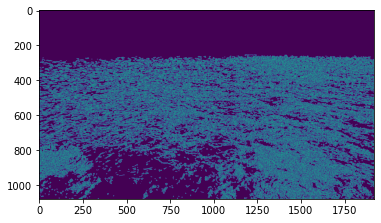

In [44]:
plt.imshow(canny)